In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
from keras.constraints import max_norm
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Model configuration
img_width, img_height = 28, 28
batch_size = 150
no_epochs = 50
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
noise_factor = 0.05
number_of_visualizations = 6

In [17]:
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [18]:
input_train = input_train.reshape((-1,28,28,1)).astype('float32')/255.0
input_test = input_test.reshape((-1,28,28,1)).astype('float32')/255.0

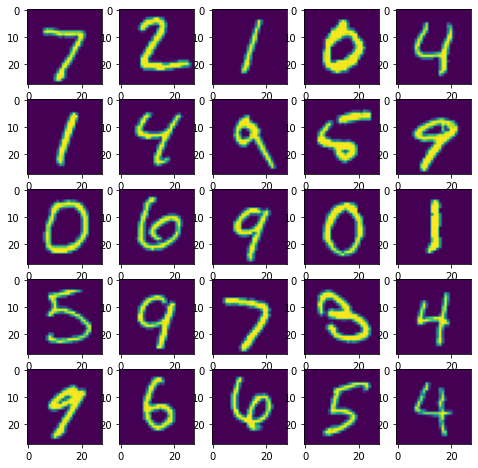

In [27]:
def plot_image(images, r, c):
  assert r*c == images.shape[0]
  fig=plt.figure(figsize=(8, 8))
  for i in range(1, c*r +1):
    fig.add_subplot(r, c, i)
    plt.imshow(images[i-1].reshape((28,28)))
  plt.show()

samples = input_test[:25]
plot_image(samples, 5, 5)

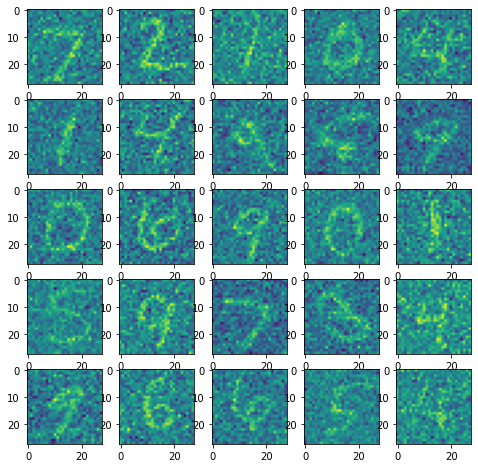

In [31]:
noise_factor = 0.55
pure = input_train
pure_test = input_test
noise = np.random.normal(0, 1, pure.shape)
noise_test = np.random.normal(0, 1, pure_test.shape)
noisy_input = pure + noise_factor * noise
noisy_input_test = pure_test + noise_factor * noise_test

nsamples = noisy_input_test[:25]
plot_image(nsamples, 5, 5)

In [34]:
model = Sequential()
model.add(Conv2D(64,3,2, kernel_initializer='he_uniform', padding='same',input_shape=(28,28,1)))
model.add(Conv2D(32,3,2, kernel_initializer='he_uniform', padding='same'))
model.add(Conv2DTranspose(32, 3, 2, kernel_initializer='he_uniform', padding='same'))
model.add(Conv2DTranspose(64, 3, 2, kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(1, 3, 1, activation='sigmoid', padding='same'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         577       
Total params: 47,425
Trainable params: 47,425
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(noisy_input, pure,
                epochs=4,
                batch_size=batch_size,
                validation_split=validation_split)

Epoch 1/4
320/320 [==============================] - 145s 454ms/step - loss: 0.1271 - val_loss: 0.1239
Epoch 2/4
320/320 [==============================] - 137s 428ms/step - loss: 0.1228 - val_loss: 0.1232
Epoch 3/4
320/320 [==============================] - 136s 426ms/step - loss: 0.1225 - val_loss: 0.1230
Epoch 4/4
320/320 [==============================] - 136s 425ms/step - loss: 0.1223 - val_loss: 0.1230


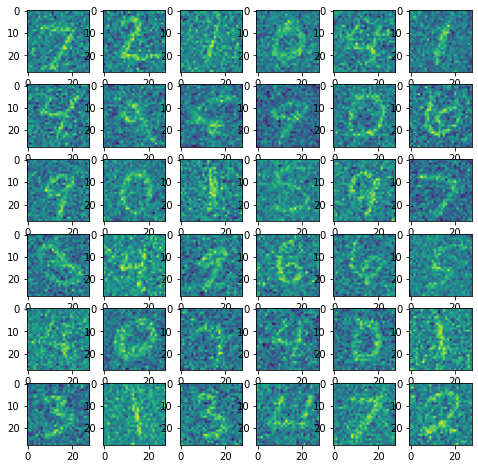

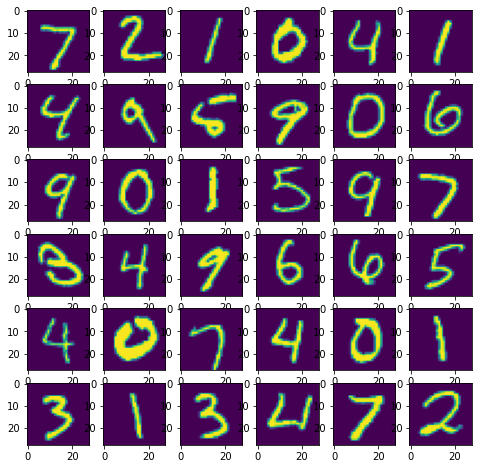

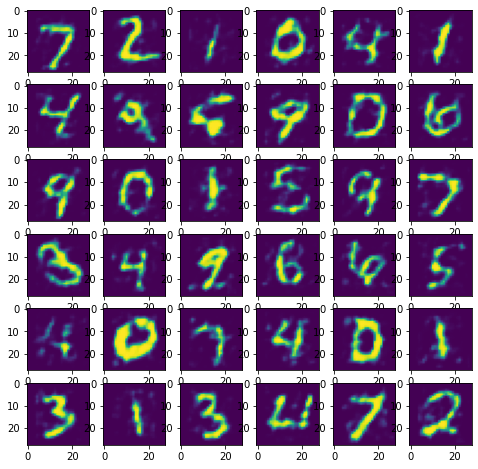

In [37]:
nsamples = noisy_input_test[:36]
npuresamples = pure_test[:36]
denoised = model.predict(nsamples)

plot_image(nsamples, 6, 6)
plot_image(npuresamples, 6, 6)
plot_image(denoised, 6, 6)